#  *Black-Scholes model for pricing European options*

The Black-Scholes model is one of the most important mathematical models that determines the fair value of an options contract. It is a differential equation and requires five input variables: the strike price of an option, the current stock price, the time to expiration, the risk-free rate, and the volatility.

The key assumptions of this model are:
- No dividends are paid out during the option's life
- Markets are random because market movements can't be predicted.
- There are no transaction costs in buying the option.
- The risk-free rate and volatility of the underlying asset are known and constant.
- The returns of the underlying asset are normally distributed.
- The option is European and can only be exercised at expiration.

Given by:

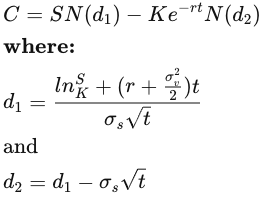

- C: call price
- S: spot price
- K: strike price
- r: risk-free rate
- t: time till maturity
- N: normal distribution
- σ: volatility
- d₁: probability factor that accounts for the expected stock price if the option is exercised
- d₂: probability factor that represents the risk-adjusted probability that the option will be exercised

In [105]:
import numpy as np
import pandas as pd
from scipy import stats as st

In [106]:
# Define the European option pricing formula
def eu_pricing(list, type='call'):
    try:
        d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/sigma*np.sqrt(T)
        d2 = d1 - sigma*np.sqrt(T)
        
        if type == 'call':
            call_price = S*st.norm.cdf(d1)-K*np.exp(-r*T)*st.norm.cdf(d2)
            return f'European call price: ${np.round(call_price, 4)}'
        
        elif type == 'put':
            put_price = K*np.exp(-r*T)*st.norm.cdf(-d2)-S*st.norm.cdf(-d1)
            return f'European put price: ${np.round(put_price, 4)}'
        
        else:
            raise ValueError("Invalid option type. Must be 'call' or 'put'. ")
    
    except Exception as e:
        return f'An error occurred: {str(e)}'

In [107]:
# Create function to allow users to enter values for the parameters
list = [] # create an empty list

# Input the parameters and append them in the list
S = float(input('Enter the spot price:'))
list.append(S)

K = float(input('Enter the strike price:'))
list.append(K)

r = float(input('Enter the risk-free interest rate:'))
list.append(r)

T = float(input('Enter the maturity date:'))
list.append(T)

sigma = float(input('Enter the volatility:'))
list.append(sigma)

# Input the type of the European option
type = str(input('Type of the European option(call/put):'))

# Display the list
print(list)

# Compute the European call/put price
eu_pricing(list, type)

Enter the spot price: 100
Enter the strike price: 25
Enter the risk-free interest rate: 0.02
Enter the maturity date: 0.5
Enter the volatility: 0.1
Type of the European option(call/put): call


[100.0, 25.0, 0.02, 0.5, 0.1]


'European call price: $75.2488'

## *Model deployment with Streamlit app*

In [109]:
import streamlit as st
import numpy as np
from scipy import stats 

# Define the European option pricing formula
def eu_pricing(S, K, r, T, sigma, type='call'):
    try:
        d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/sigma*np.sqrt(T)
        d2 = d1 - sigma*np.sqrt(T)
        
        if type == 'call':
            call_price = S*st.norm.cdf(d1)-K*np.exp(-r*T)*st.norm.cdf(d2)
            return f'European call price: ${np.round(call_price, 4)}'
        
        elif type == 'put':
            put_price = K*np.exp(-r*T)*st.norm.cdf(-d2)-S*st.norm.cdf(-d1)
            return f'European put price: ${np.round(put_price, 4)}'
        
        else:
            raise ValueError("Invalid option type. Must be 'call' or 'put'. ")
    
    except Exception as e:
        return f'An error occurred: {str(e)}'

# Define the Streamlit app for European option pricing

def main():
    st.title("European Options Pricing APP")
    
    st.sidebar.header("Options Pricing Parameters")
    S = st.sidebar.number_input("Current Stock Price", min_value=0.0, value=100.0, step=0.1)
    K = st.sidebar.number_input("Strike Price", min_value=0.0, value=100.0, step=0.1)
    r = st.sidebar.number_input("Risk-free rate", min_value=0.0, value=0.05, step=0.1)
    T = st.sidebar.number_input("Time to maturity", min_value=0.0, value=1.0, step=0.1)
    sigma = st.sidebar.number_input("Volatility", min_value=0.0, value=0.2, step=0.1)
    
    # Option type selector
    option_type=st.sidebar.selectbox("Option Type", ['call', 'put'])
    
    # Calculate and display results
    result = eu_pricing(S, K, r, T, sigma, type=option_type)
    
    st.subheader("Options Pricing Result")
    st.write(result)

# Allows the function to be callable when imported into another Python program
if __name__ == "__main__":
    main()